## statsmodels의 전처리 기능

StatsModels 패키지는 통계분석과 관련된 R의 기능을 파이썬으로 옮겨오기 위한 패키지이다. R에는 데이터프레임과 문자열 기호를 이용하여 회귀모형을 정의하는 방법이 존재한다. StatsModels 패키지도 이러한 R 스타일 모형 정의 방법을 지원한다. 이러한 지원을 가능하게 하는 것은 patsy라는 패키지 덕분이다. 여기에서는 patsy 패키지의 간단한 사용법과 이를 이용하여 StatsModels에서 회귀모형을 정의하는 방법을 설명한다.

#### pasty
- patsy 패키지는 회귀분석 전처리를 위한 패키지로 데이터프레임을 가공하여 인코딩, 변환 등을 쉽게 해주는 기능을 제공한다.

In [5]:
from patsy import *

patsy 패키지의 dmatrix라는 명령을 사용하면 실험 설계 행렬(experiment design matrix)을 간단히 만들수 있다. dmatrix에 다음과 같이 모형 정의 문자열 formula와 원 데이터를 담은 데이터프레임 data을 입력하면 formula에서 지정한 대로 변환된 데이터 data_transformed를 출력한다.

data_transformed = dmatrix(formula, data)

In [8]:
import pandas as pd

In [10]:
df = pd.DataFrame(demo_data("x1", "x2", "y"))
df

,x1,x2,y
0,1.764052,-0.977278,0.144044
1,0.400157,0.950088,1.454274
2,0.978738,-0.151357,0.761038
3,2.240893,-0.103219,0.121675
4,1.867558,0.410599,0.443863


dmatrix의 첫번째 기능은 자동 상수항 결합 기능이다. 대상이 되는 데이터에 자동으로 Intecept라는 이름의 데이터 열을 추가한다.

다음 예제에서 스타일 문자열은 단순히 "x1"이다. 스타일 문자열은 데이터와 연산자로 이루어지는데 데이터는 변수명 혹은 데이터프레임 열 이름으로 지정한다. 변수명으로 지정하는 경우에는 현재의 이름 공간(name space)에서 변수를 찾고 데이터프레임 열 이름을 지정하는 경우에는 data라는 인수에 데이터프레임을 넣어주어야 한다.

In [11]:
dmatrix("x1",df)

DesignMatrix with shape (5, 2)
  Intercept       x1
          1  1.76405
          1  0.40016
          1  0.97874
          1  2.24089
          1  1.86756
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)

#### R-style formula 연산자

- 모형정의 연산자 formula에 복수의 데이터를 지정하는 경우에는 다음과 같은 연산자를 포함해야 한다.

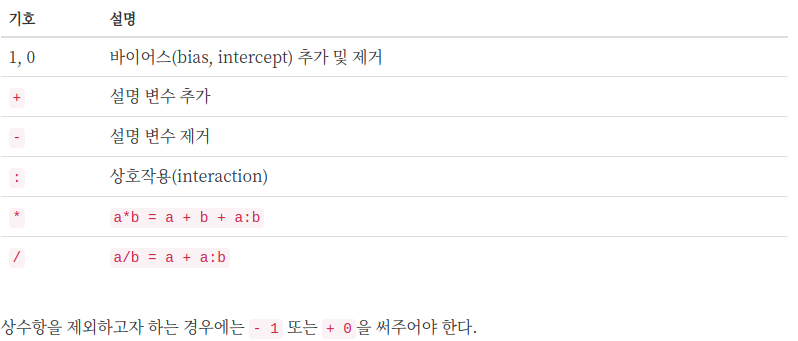

In [13]:
dmatrix("x1 - 1", df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [14]:
dmatrix("x1 + 0", df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [15]:
dmatrix("x1 + x2", df)

DesignMatrix with shape (5, 3)
  Intercept       x1        x2
          1  1.76405  -0.97728
          1  0.40016   0.95009
          1  0.97874  -0.15136
          1  2.24089  -0.10322
          1  1.86756   0.41060
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

In [16]:
dmatrix("x1 + x2 - 1", df)

DesignMatrix with shape (5, 2)
       x1        x2
  1.76405  -0.97728
  0.40016   0.95009
  0.97874  -0.15136
  2.24089  -0.10322
  1.86756   0.41060
  Terms:
    'x1' (column 0)
    'x2' (column 1)

두 변수의 곱을 새로운 변수로 추가하려면 상호작용(interaction) 연산자 :를 사용한다.

In [17]:
dmatrix("x1 + x2 + x1:x2", df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2     x1:x2
          1  1.76405  -0.97728  -1.72397
          1  0.40016   0.95009   0.38018
          1  0.97874  -0.15136  -0.14814
          1  2.24089  -0.10322  -0.23130
          1  1.86756   0.41060   0.76682
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

위 식은 다음과 같이 * 연산자로 간단하게 나타낼 수도 있다.

In [18]:
dmatrix("x1 * x2", df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2     x1:x2
          1  1.76405  -0.97728  -1.72397
          1  0.40016   0.95009   0.38018
          1  0.97874  -0.15136  -0.14814
          1  2.24089  -0.10322  -0.23130
          1  1.86756   0.41060   0.76682
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

/ 연산자는 두번째 데이터를 빼고 출력한다.

In [19]:
dmatrix("x1 / x2", df)

DesignMatrix with shape (5, 3)
  Intercept       x1     x1:x2
          1  1.76405  -1.72397
          1  0.40016   0.38018
          1  0.97874  -0.14814
          1  2.24089  -0.23130
          1  1.86756   0.76682
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x1:x2' (column 2)

### 수학 변환

dmatrix에서는 일반적인 수학 변환(transform)도 가능하다. numpy 함수 뿐 아니라 사용자 정의 함수도 사용할 수 있다.

In [21]:
import numpy as np

In [22]:
dmatrix("x1 + np.log(np.abs(x2))", df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [23]:
def doubleit(x):
    return 2 * x

dmatrix("doubleit(x1)", df)

DesignMatrix with shape (5, 2)
  Intercept  doubleit(x1)
          1       3.52810
          1       0.80031
          1       1.95748
          1       4.48179
          1       3.73512
  Terms:
    'Intercept' (column 0)
    'doubleit(x1)' (column 1)

### 상태 보존 변환

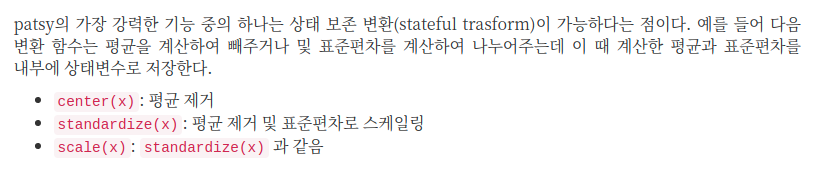

이 변환 연산은 다음과 같이 x1 데이터에서 x1의 평균을 빼는 것이다.

In [30]:
dm = dmatrix("center(x1)", df)
dm

DesignMatrix with shape (5, 2)
  Intercept  center(x1)
          1     0.31377
          1    -1.05012
          1    -0.47154
          1     0.79061
          1     0.41728
  Terms:
    'Intercept' (column 0)
    'center(x1)' (column 1)

In [25]:
df.x1 - np.mean(df.x1)

0    0.313773
1   -1.050123
2   -0.471542
3    0.790613
4    0.417278
Name: x1, dtype: float64

그런데 이 때 사용한 평균값은 design_info라는 속성에 상태변수(state variable)로서 저장된다.

In [32]:
type(dm.design_info)

patsy.design_info.DesignInfo

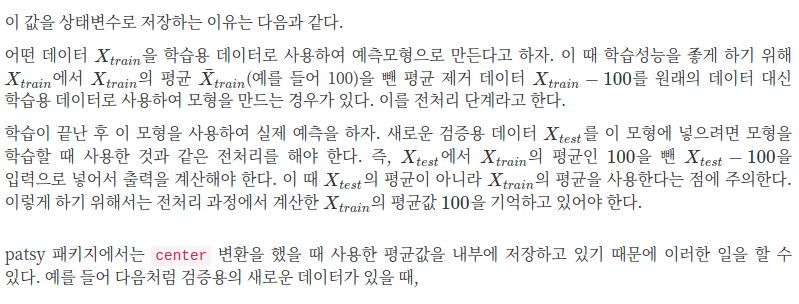

In [33]:
df_new = df.copy()
df_new["x1"] = df_new["x1"] * 10
df_new

,x1,x2,y
0,17.640523,-0.977278,0.144044
1,4.001572,0.950088,1.454274
2,9.787380,-0.151357,0.761038
3,22.408932,-0.103219,0.121675
4,18.675580,0.410599,0.443863


build_design_matrices 명령을 사용하면 이미 저장된 x1의 평균을 이용하여 같은 변환을 한다.

In [34]:
build_design_matrices([dm.design_info],df_new)

[DesignMatrix with shape (5, 2)
   Intercept  center(x1)
           1    16.19024
           1     2.55129
           1     8.33710
           1    20.95865
           1    17.22530
   Terms:
     'Intercept' (column 0)
     'center(x1)' (column 1)]

In [35]:
df_new.x1 - np.mean(df.x1)

0    16.190244
1     2.551292
2     8.337100
3    20.958652
4    17.225300
Name: x1, dtype: float64

평균값을 다시 새롭게 구해서 계산한 것과 다르다는 것을 알 수있다.

In [36]:
dmatrix("center(x1)", df_new)

DesignMatrix with shape (5, 2)
  Intercept  center(x1)
          1     3.13773
          1   -10.50123
          1    -4.71542
          1     7.90613
          1     4.17278
  Terms:
    'Intercept' (column 0)
    'center(x1)' (column 1)

In [37]:
df_new.x1 - np.mean(df_new.x1)

0     3.137726
1   -10.501225
2    -4.715418
3     7.906135
4     4.172782
Name: x1, dtype: float64

## 변수 보호

함수를 사용한 변수 변환 이외에도 모형 정의 문자열 자체내에 연산기호를 넣어 연산한 값을 만드는 것도 가능하다. 이 때에는 모형정의 연산자와 혼동되지 않도록 I() 연산자를 추가해야 한다.

In [38]:
dmatrix("I(x1 + x2)", df)

DesignMatrix with shape (5, 2)
  Intercept  I(x1 + x2)
          1     0.78677
          1     1.35025
          1     0.82738
          1     2.13767
          1     2.27816
  Terms:
    'Intercept' (column 0)
    'I(x1 + x2)' (column 1)

In [39]:
dmatrix("x1 + x2", df)

DesignMatrix with shape (5, 3)
  Intercept       x1        x2
          1  1.76405  -0.97728
          1  0.40016   0.95009
          1  0.97874  -0.15136
          1  2.24089  -0.10322
          1  1.86756   0.41060
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

## 다항회귀

In [40]:
dmatrix("x1 + I(x1*x1) + I(x1**3) + I(x1**4)", df)

DesignMatrix with shape (5, 5)
  Intercept       x1  I(x1 * x1)  I(x1 ** 3)  I(x1 ** 4)
          1  1.76405     3.11188     5.48952     9.68380
          1  0.40016     0.16013     0.06408     0.02564
          1  0.97874     0.95793     0.93756     0.91763
          1  2.24089     5.02160    11.25287    25.21649
          1  1.86756     3.48777     6.51362    12.16456
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'I(x1 * x1)' (column 2)
    'I(x1 ** 3)' (column 3)
    'I(x1 ** 4)' (column 4)

## OLS.from_formula 메서드

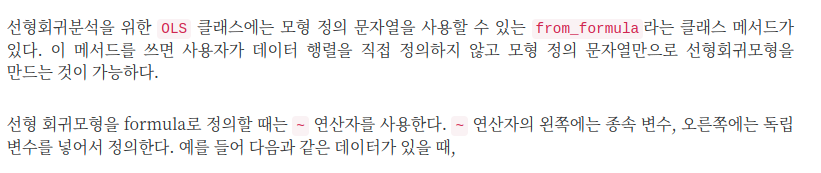

In [45]:
import statsmodels.api as sm

In [41]:
np.random.seed(0)
x1 = np.random.rand(20) + 10
x2 = np.random.rand(20) * 10
y = x1 + 2 * x2 + np.random.randn(20)
df4 = pd.DataFrame(np.array([x1, x2, y]).T, columns=["x1", "x2", "y"])

In [46]:
# 직접 데이터 행렬을 만드는 경우
dfy = df4.iloc[:, -1]
dfX = sm.add_constant(df4.iloc[:, :-1])
model1 = sm.OLS(dfy, dfX)

print(model1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     246.8
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           2.75e-13
Time:                        16:46:39   Log-Likelihood:                -29.000
No. Observations:                  20   AIC:                             64.00
Df Residuals:                      17   BIC:                             66.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4226     10.140      0.140      0.8

In [47]:
# 모형 정의 문자열을 사용하는 경우
model2 = sm.OLS.from_formula("y ~ x1 + x2", data=df4)

print(model2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     246.8
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           2.75e-13
Time:                        16:46:45   Log-Likelihood:                -29.000
No. Observations:                  20   AIC:                             64.00
Df Residuals:                      17   BIC:                             66.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4226     10.140      0.140      0.8